In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("beer_reviews.csv")
df.head(10)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
5,1075,Caldera Brewing Company,1325524659,3.0,3.5,3.5,oline73,Herbed / Spiced Beer,3.0,3.5,Caldera Ginger Beer,4.7,52159
6,1075,Caldera Brewing Company,1318991115,3.5,3.5,3.5,Reidrover,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159
7,1075,Caldera Brewing Company,1306276018,3.0,2.5,3.5,alpinebryant,Herbed / Spiced Beer,2.0,3.5,Caldera Ginger Beer,4.7,52159
8,1075,Caldera Brewing Company,1290454503,4.0,3.0,3.5,LordAdmNelson,Herbed / Spiced Beer,3.5,4.0,Caldera Ginger Beer,4.7,52159
9,1075,Caldera Brewing Company,1285632924,4.5,3.5,5.0,augustgarage,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159


In [3]:
col = ['beer_beerid','review_profilename','review_overall']
beer_ratings = df[col]
beer_ratings.head(500)

,beer_beerid,review_profilename,review_overall
0,47986,stcules,1.5
1,48213,stcules,3.0
2,48215,stcules,3.0
3,47969,stcules,3.0
4,64883,johnmichaelsen,4.0
...,...,...,...
495,10784,callmescraps,3.5
496,10784,woodychandler,5.0
497,10784,Primitivechef,4.0
498,10784,BevMoAndrew,4.5


In [4]:
beer_ratings.dtypes

beer_beerid             int64
review_profilename     object
review_overall        float64
dtype: object

In [5]:
beer_ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
beer_beerid,1586614.0,21712.794279,21818.335997,3.0,1717.0,13906.0,39441.0,77317.0
review_overall,1586614.0,3.815581,0.720622,0.0,3.5,4.0,4.5,5.0


In [6]:
shape = beer_ratings.shape
shape

(1586614, 3)

In [7]:
beer_ratings.drop_duplicates(subset=['beer_beerid','review_profilename'], inplace = True)

C:\Users\82105\anaconda3\envs\pytorch\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [8]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(beer_ratings.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(beer_ratings.isnull().sum()/beer_ratings.shape[0]),2).sort_values(ascending=False)\
,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
review_profilename,328,0.02
beer_beerid,0,0.00
review_overall,0,0.00


In [9]:
beer_ratings['review_profilename'].isnull().sum()

328

In [10]:
# removing rows where a particular column has high missing values because the column cannot be removed because of its importance
beer_ratings = beer_ratings[~pd.isnull(beer_ratings['review_profilename'])]
beer_ratings.shape

(1571480, 3)

In [11]:
reviewsperbeer=beer_ratings.groupby('beer_beerid')['review_overall'].count().reset_index().sort_values(by=['review_overall'],ascending=False)
reviewsperbeer.head()

,beer_beerid,review_overall
1783,2093,3206
367,412,3038
1621,1904,2929
3414,4083,2644
81,92,2633


In [12]:
round(reviewsperbeer.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
beer_beerid,66051.0,39719.18,22416.34,3.0,20504.5,40508.0,59208.0,77317.0
review_overall,66051.0,23.79,109.22,1.0,1.0,2.0,7.0,3206.0


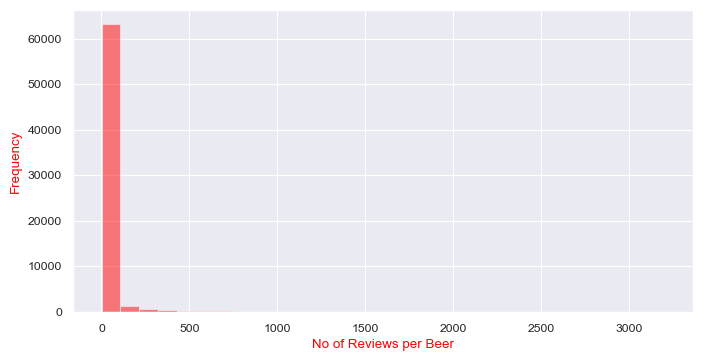

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("darkgrid") # white/whitegrid/dark/darkgrid/ticks
sns.set_context("paper") # talk/poster

plt.hist(reviewsperbeer['review_overall'],alpha=0.5,color='red', bins=30)
# plot x axis label
plt.xlabel('No of Reviews per Beer', color='r')
# plot y axis label
plt.ylabel('Frequency', color='r')
# display the plot
plt.show()

In [14]:
#리뷰 수에 따른 맥주 개수

reviewsfrequency=reviewsperbeer.groupby('review_overall')['beer_beerid'].count().reset_index()
reviewsfrequency.columns.values[:]=['Total Beer Reviews','Review Frequency']
reviewsfrequency.head(10)

,Total Beer Reviews,Review Frequency
0,1,23819
1,2,10394
2,3,5782
3,4,3749
4,5,2596
5,6,1901
6,7,1504
7,8,1176
8,9,966
9,10,836


In [15]:
#리뷰 수 50개 이상만 뽑아내기

above50reviewsperbeer = reviewsperbeer.loc[reviewsperbeer['review_overall'] >= 50]
above50reviewsperbeer.columns.values[1]='Total Review Count of Beer'
above50reviewsperbeer.head()

,beer_beerid,Total Review Count of Beer
1783,2093,3206
367,412,3038
1621,1904,2929
3414,4083,2644
81,92,2633


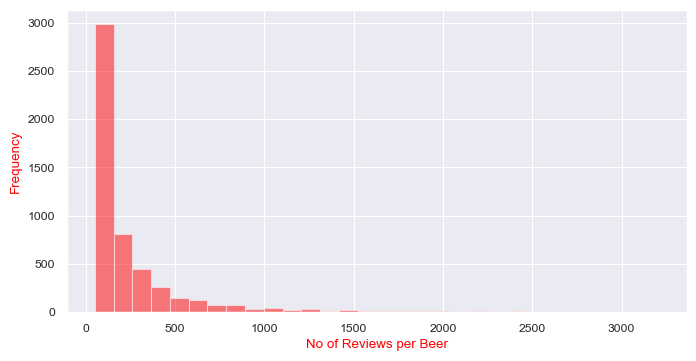

In [16]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("darkgrid") # white/whitegrid/dark/darkgrid/ticks
sns.set_context("paper") # talk/poster

plt.hist(above50reviewsperbeer['review_overall'],alpha=0.5,color='red', bins=30)
# plot x axis label
plt.xlabel('No of Reviews per Beer', color='r')
# plot y axis label
plt.ylabel('Frequency', color='r')
# display the plot
plt.show()

In [17]:
#user기준

reviewsperreviewer=beer_ratings.groupby('review_profilename')['review_overall'].count().reset_index().sort_values(by=['review_overall'],ascending=False)
reviewsperreviewer.head()

,review_profilename,review_overall
26927,northyorksammy,5782
2351,BuckeyeNation,4653
25703,mikesgroove,4559
12378,Thorpe429,3517
32912,womencantsail,3489


In [18]:
round(reviewsperreviewer.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
review_overall,33387.0,47.07,180.15,1.0,1.0,3.0,16.0,5782.0


In [19]:
#유저 이름에 따라 리뷰 수 구하기

above30reviewsperreviewer = reviewsperreviewer.loc[reviewsperreviewer['review_overall'] >= 30]
above30reviewsperreviewer.columns.values[1]='Total Reviews by User'
above30reviewsperreviewer.head()

,review_profilename,Total Reviews by User
26927,northyorksammy,5782
2351,BuckeyeNation,4653
25703,mikesgroove,4559
12378,Thorpe429,3517
32912,womencantsail,3489


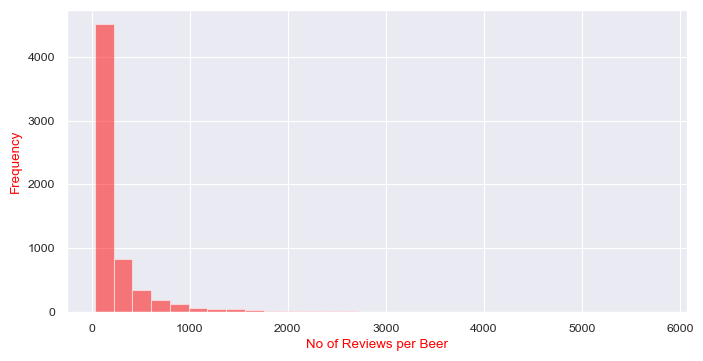

In [20]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("darkgrid") # white/whitegrid/dark/darkgrid/ticks
sns.set_context("paper") # talk/poster

plt.hist(above30reviewsperreviewer['review_overall'],alpha=0.5,color='red', bins=30)
# plot x axis label
plt.xlabel('No of Reviews per Beer', color='r')
# plot y axis label
plt.ylabel('Frequency', color='r')
# display the plot
plt.show()

In [21]:
beers_for_recommendation = pd.merge(beer_ratings, above50reviewsperbeer, how='inner', on='beer_beerid')
beers_for_recommendation = pd.merge(beers_for_recommendation, above30reviewsperreviewer, how='inner', on='review_profilename')
beers_for_recommendation.shape

(1132978, 5)

In [22]:
beers_for_recommendation['review_profilename'].value_counts().head()

BuckeyeNation     3200
mikesgroove       3026
northyorksammy    2685
brentk56          2470
ChainGangGuy      2302
Name: review_profilename, dtype: int64

In [23]:
sorted(beers_for_recommendation['review_overall'].unique())

[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

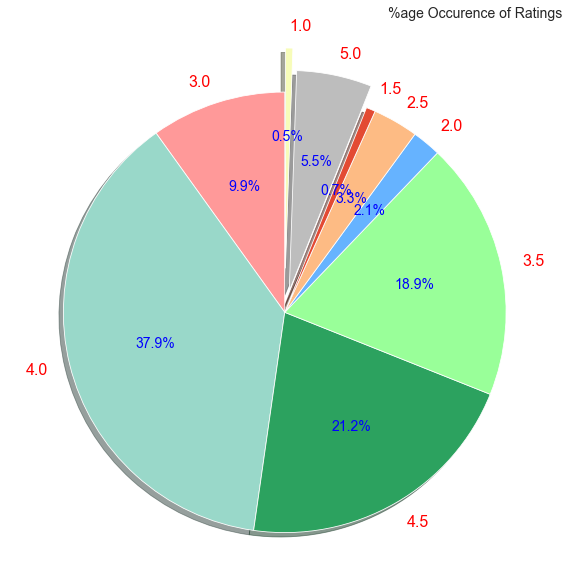

In [24]:
from collections import Counter

labels, values = zip(*Counter(beers_for_recommendation["review_overall"]).items())
colors = ["#ff9999", "#99d8c9", "#2ca25f", "#99ff99","#66b3ff","#fdbb84","#e34a33","#bdbdbd","#f7fcb9","#99ff99","#f7fcb9","#fec44f","#d95f0e","#dd1c77","#99ff99"]
explode = (0, 0, 0, 0, 0, 0, 0, 0.1, 0.2)
piechart_df = (pd.DataFrame(list(values),list(labels)))
piechart_df = piechart_df.reset_index()

fig = plt.figure(figsize=[8,8])
patches, texts, autotexts = plt.pie(piechart_df[0], labels=piechart_df["index"], \
                                    startangle=90, colors = colors, autopct='%.1f%%', \
                                    shadow=True,explode=explode, textprops={'fontsize': 10})

plt.title("%age Occurence of Ratings", fontsize=14, loc='right')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
for autotext in autotexts:
    autotext.set_color('blue')
    autotext.set_fontsize('14')

for text in texts:
    text.set_color('red')
    text.set_fontsize('16')    
    
    
plt.tight_layout()    
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(beers_for_recommendation, test_size=0.30, random_state=31)

In [26]:
print(train.shape)
print(test.shape)

(793084, 5)
(339894, 5)


In [27]:
# pivot ratings into beer features
df_beer_features = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(0)

In [28]:
df_beer_features.head()

beer_beerid,5,6,7,8,9,10,11,12,13,14,...,74827,74904,74986,75013,75086,75188,75230,76144,76525,76816
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1099.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
df_beer_features.shape

(6225, 5135)

In [31]:
#user_similarity Matrix


from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
reviewer_correlation = 1 - pairwise_distances(df_beer_features, metric='cosine')
reviewer_correlation[np.isnan(reviewer_correlation)] = 0
print(reviewer_correlation)

[[1.         0.13307822 0.03077532 ... 0.05402657 0.02255411 0.02388445]
 [0.13307822 1.         0.05100228 ... 0.06969642 0.01738498 0.        ]
 [0.03077532 0.05100228 1.         ... 0.02428305 0.08606347 0.03943552]
 ...
 [0.05402657 0.06969642 0.02428305 ... 1.         0.12146588 0.        ]
 [0.02255411 0.01738498 0.08606347 ... 0.12146588 1.         0.08645554]
 [0.02388445 0.         0.03943552 ... 0.         0.08645554 1.        ]]


In [32]:
beer_features_user = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [33]:
beer_features_user.head()

beer_beerid,5,6,7,8,9,10,11,12,13,14,...,74827,74904,74986,75013,75086,75188,75230,76144,76525,76816
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0tt0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100floods,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1099.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
mean = np.nanmean(beer_features_user, axis=1)
df_subtracted_user = (beer_features_user.T-mean).T

df_subtracted_user.head()

beer_beerid,5,6,7,8,9,10,11,12,13,14,...,74827,74904,74986,75013,75086,75188,75230,76144,76525,76816
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.23125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0tt0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100floods,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1099.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
reviewer_correlation = 1 - pairwise_distances(df_subtracted_user.fillna(0), metric='cosine')
reviewer_correlation[np.isnan(reviewer_correlation)] = 0
print(reviewer_correlation)

[[ 1.00000000e+00  1.92599305e-02  3.20514317e-02 ...  2.00864222e-02
   1.77871077e-02 -9.27142764e-03]
 [ 1.92599305e-02  1.00000000e+00  5.54358503e-02 ...  2.99038081e-02
   3.18792539e-03  0.00000000e+00]
 [ 3.20514317e-02  5.54358503e-02  1.00000000e+00 ...  6.95059280e-04
   6.89018305e-03 -7.65026022e-03]
 ...
 [ 2.00864222e-02  2.99038081e-02  6.95059280e-04 ...  1.00000000e+00
  -7.43166852e-04  0.00000000e+00]
 [ 1.77871077e-02  3.18792539e-03  6.89018305e-03 ... -7.43166852e-04
   1.00000000e+00  1.61801171e-02]
 [-9.27142764e-03  0.00000000e+00 -7.65026022e-03 ...  0.00000000e+00
   1.61801171e-02  1.00000000e+00]]


In [36]:
#처음 10명 유저로 similarity

Fst_10_reviewers = df_subtracted_user.index[0:10].values
Fst_10_reviewers

array(['0110x011', '05Harley', '0tt0', '100floods', '1099.0',
       '11osixBrew', '1759Girl', '1Adam12', '1fastz28', '1morebeer'],
      dtype=object)

In [37]:
Fst_10_reviewers_corr = pd.DataFrame(reviewer_correlation[:10,:10])
Fst_10_reviewers_corr.columns = Fst_10_reviewers
Fst_10_reviewers_corr.index = Fst_10_reviewers
Fst_10_reviewers_corr

,0110x011,05Harley,0tt0,100floods,1099.0,11osixBrew,1759Girl,1Adam12,1fastz28,1morebeer
0110x011,1.000000,0.019260,0.032051,0.009845,0.000000,-0.008468,0.045519,0.003399,-0.000749,0.000000
05Harley,0.019260,1.000000,0.055436,0.019047,0.000000,0.012534,0.056502,-0.018927,0.017775,0.042226
0tt0,0.032051,0.055436,1.000000,-0.080134,0.000000,-0.009244,0.021047,0.009637,0.047643,0.000000
100floods,0.009845,0.019047,-0.080134,1.000000,0.000000,0.061227,-0.025221,0.010416,-0.009384,0.000000
1099.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.051357,0.008449,0.000000,0.007050,0.026320
11osixBrew,-0.008468,0.012534,-0.009244,0.061227,0.051357,1.000000,0.000000,0.242568,0.028892,-0.000438
1759Girl,0.045519,0.056502,0.021047,-0.025221,0.008449,0.000000,1.000000,-0.010902,0.041632,-0.005945
1Adam12,0.003399,-0.018927,0.009637,0.010416,0.000000,0.242568,-0.010902,1.000000,0.049806,0.005286
1fastz28,-0.000749,0.017775,0.047643,-0.009384,0.007050,0.028892,0.041632,0.049806,1.000000,0.032278
1morebeer,0.000000,0.042226,0.000000,0.000000,0.026320,-0.000438,-0.005945,0.005286,0.032278,1.000000


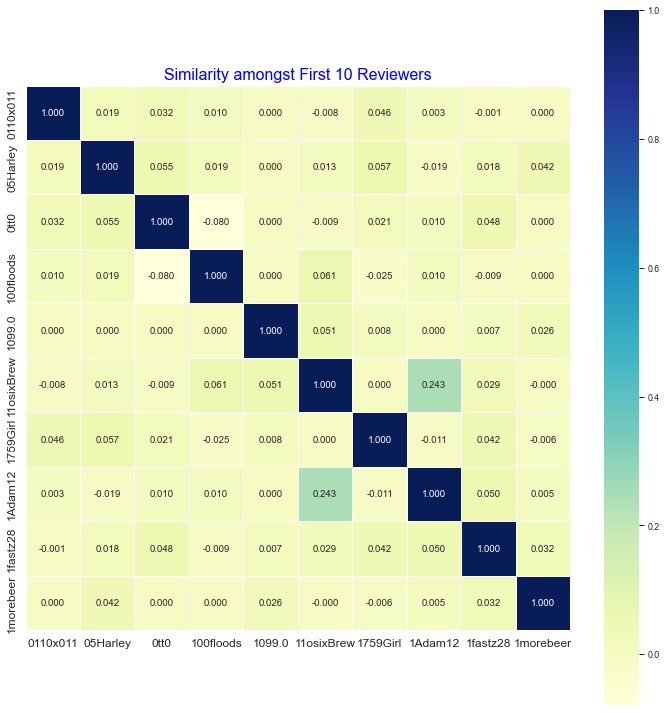

In [38]:
# buildin a heatmap of correlation of first 10 users
plt.figure(figsize=(10,10))

sns.heatmap(Fst_10_reviewers_corr, cmap="YlGnBu", linewidths = 0.5, annot=True,square = True, fmt=".3f")
plt.title('Similarity amongst First 10 Reviewers', size = 16, color = 'b');
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

In [39]:
beer_features_item = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).T
beer_features_item.head()

review_profilename,0110x011,05Harley,0tt0,100floods,1099.0,11osixBrew,1759Girl,1Adam12,1fastz28,1morebeer,...,zjungleist,znichols,zoolzoo,zoso1967,zoso493,zrab11,ztaylor1,zuffenhausen,zuggy9,zymurgy4all
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
mean = np.nanmean(beer_features_item, axis=1)
df_subtracted_item = (beer_features_item.T-mean).T

In [41]:
df_subtracted_item.head()

review_profilename,0110x011,05Harley,0tt0,100floods,1099.0,11osixBrew,1759Girl,1Adam12,1fastz28,1morebeer,...,zjungleist,znichols,zoolzoo,zoso1967,zoso493,zrab11,ztaylor1,zuffenhausen,zuggy9,zymurgy4all
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.195811,NaN,...,NaN,NaN,NaN,NaN,NaN,0.304189,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
beer_correlation = 1 - pairwise_distances(df_subtracted_item.fillna(0), metric='cosine')
beer_correlation[np.isnan(beer_correlation)] = 0
print(beer_correlation)

[[ 1.00000000e+00  5.62016506e-02  1.03992127e-01 ... -3.18363787e-03
  -3.15392441e-02  3.66949724e-02]
 [ 5.62016506e-02  1.00000000e+00  6.78882299e-02 ...  1.79334181e-03
  -4.08647833e-04 -1.18404126e-02]
 [ 1.03992127e-01  6.78882299e-02  1.00000000e+00 ... -4.77501552e-03
  -6.94789235e-03 -3.57748719e-03]
 ...
 [-3.18363787e-03  1.79334181e-03 -4.77501552e-03 ...  1.00000000e+00
  -9.59148346e-02  6.96263223e-04]
 [-3.15392441e-02 -4.08647833e-04 -6.94789235e-03 ... -9.59148346e-02
   1.00000000e+00 -6.11381371e-02]
 [ 3.66949724e-02 -1.18404126e-02 -3.57748719e-03 ...  6.96263223e-04
  -6.11381371e-02  1.00000000e+00]]


In [43]:
Fst_10_Beers = df_subtracted_item.index[0:10].values
Fst_10_Beers

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14], dtype=int64)

In [44]:
Fst_10_beers_corr = pd.DataFrame(beer_correlation[:10,:10])
Fst_10_beers_corr.columns = Fst_10_Beers
Fst_10_beers_corr.index = Fst_10_Beers
Fst_10_beers_corr

,5,6,7,8,9,10,11,12,13,14
5,1.000000,0.056202,0.103992,0.033378,0.074641,-0.048634,-0.026404,-0.021034,0.102850,0.035742
6,0.056202,1.000000,0.067888,-0.017688,0.054069,0.022742,0.020143,0.032316,-0.000029,0.029183
7,0.103992,0.067888,1.000000,0.041919,0.089950,0.007353,-0.028131,-0.008358,0.028162,-0.008501
8,0.033378,-0.017688,0.041919,1.000000,0.140807,0.001567,0.000000,-0.002507,0.022661,0.043986
9,0.074641,0.054069,0.089950,0.140807,1.000000,-0.009656,0.053611,-0.024718,-0.063615,0.008984
10,-0.048634,0.022742,0.007353,0.001567,-0.009656,1.000000,-0.016987,-0.020428,0.014431,0.037945
11,-0.026404,0.020143,-0.028131,0.000000,0.053611,-0.016987,1.000000,0.010574,0.106283,-0.060723
12,-0.021034,0.032316,-0.008358,-0.002507,-0.024718,-0.020428,0.010574,1.000000,-0.023658,0.081200
13,0.102850,-0.000029,0.028162,0.022661,-0.063615,0.014431,0.106283,-0.023658,1.000000,-0.006111
14,0.035742,0.029183,-0.008501,0.043986,0.008984,0.037945,-0.060723,0.081200,-0.006111,1.000000


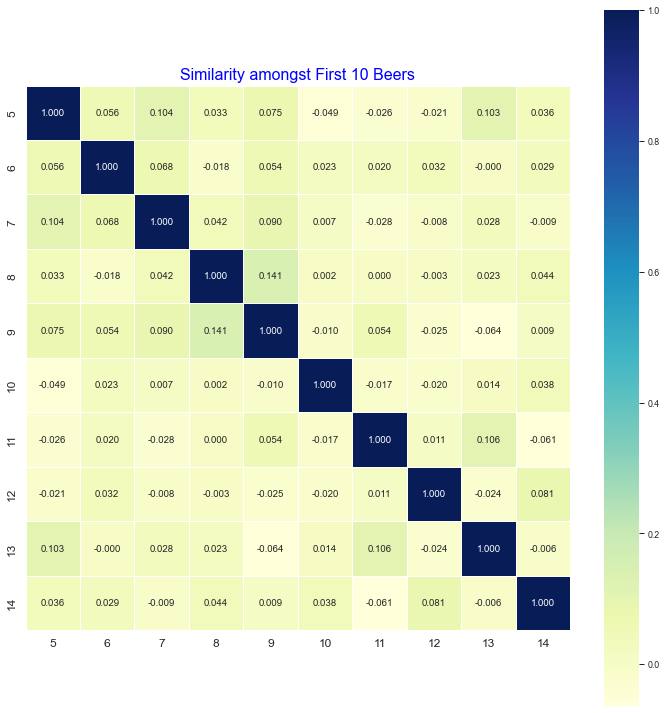

In [45]:
# buildin a heatmap of correlation of first 10 users
plt.figure(figsize=(10,10))

sns.heatmap(Fst_10_beers_corr, cmap="YlGnBu", linewidths = 0.5, annot=True,square = True, fmt=".3f")
plt.title('Similarity amongst First 10 Beers', size = 16, color = 'b');
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()